 Example 4 - Anisotropic Bearings.
====
In this example, we use the rotor seen in Example 5.9.2 from 'Dynamics of Rotating Machinery' by MI Friswell, JET Penny, SD Garvey & AW Lees, published by Cambridge University Press, 2010.

Both bearings have a stiffness of 1 MN/m in the x direction and 0.8 MN/m in the
y direction. Calculate the eigenvalues and mode shapes at 0 and 4,000 rev/min
and plot the natural frequency map for rotational speeds up to 4,500 rev/min.

In [1]:
from bokeh.io import output_notebook, show
import ross as rs
import numpy as np
output_notebook()

Loading BokehJS ...

In [2]:
#Classic Instantiation of the rotor
shaft_elements = []
bearing_seal_elements = []
disk_elements = []
steel = rs.steel

for i in range(6):
    shaft_elements.append(rs.ShaftElement(L=0.25, material=steel, n=i, idl=0, odl=0.05))
    
disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=4,
                                                  material=steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=.8e6, cxx=0, cyy=0))
bearing_seal_elements.append(rs.BearingElement(n=6, kxx=1e6, kyy=.8e6, cxx=0, cyy=0))

rotor592c = rs.Rotor(shaft_elements=shaft_elements,
                     bearing_elements=bearing_seal_elements,
                     disk_elements=disk_elements,n_eigen = 12)

show(rotor592c.plot_rotor(plot_type='bokeh'))

In [3]:
#From_section class method instantiation.
bearing_seal_elements = []
disk_elements = []
shaft_length_data = 3*[0.5]
i_d = 3*[0]
o_d = 3*[0.05]

disk_elements.append(rs.DiskElement.from_geometry(n=1,
                                                  material=steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=.8e6, cxx=0, cyy=0))
bearing_seal_elements.append(rs.BearingElement(n=3, kxx=1e6, kyy=.8e6, cxx=0, cyy=0))

rotor592fs = rs.Rotor.from_section(brg_seal_data=bearing_seal_elements,
                                   disk_data=disk_elements,leng_data=shaft_length_data,
                                   idl_data=i_d,odl_data=o_d, material_data=steel)
show(rotor592fs.plot_rotor(plot_type='bokeh'))


In [4]:
#Obtaining results for speed = 150 rad/s (wn is in rad/s)

modal592c = rotor592c.run_modal(150.0)
modal592fs = rotor592fs.run_modal(150.0)

print('Normal Instantiation =', modal592c.wn)
print('\n')
print('From Section Instantiation =', modal592fs.wn)

Normal Instantiation = [ 82.60929602  86.68625235 251.70037114 276.87787937 652.85679897
 742.60864608]


From Section Instantiation = [ 82.6103125   86.68740438 251.75040613 276.94375838 654.32910578
 745.05999629]


In [5]:
#Obtaining results for w=4000RPM (wn is in rad/s)

speed = 4000*np.pi/30
modal592c = rotor592c.run_modal(speed)

print('Normal Instantiation =', modal592c.wn)

Normal Instantiation = [ 82.32547398  86.86369902 239.64228361 287.24958074 583.48782916
 806.8872843 ]


- Campbell Diagram



In [6]:
campbell = rotor592c.run_campbell(np.linspace(0, 4000*np.pi/30, 50))
show(campbell.plot(plot_type='bokeh'))


- Mode Shapes


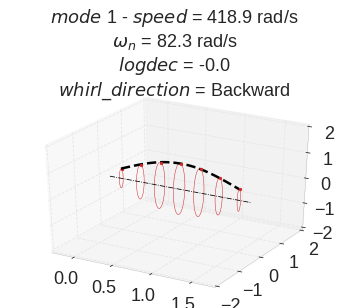

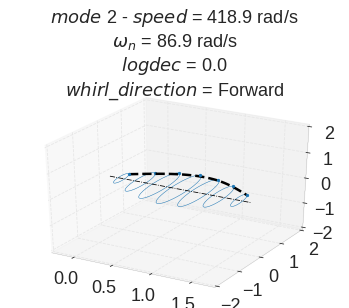

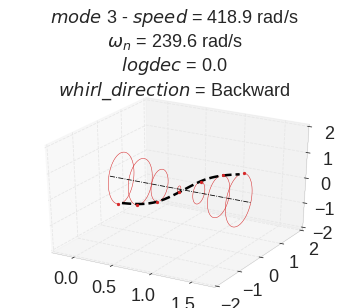

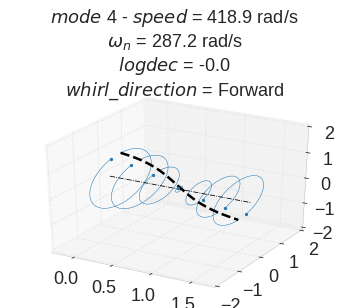

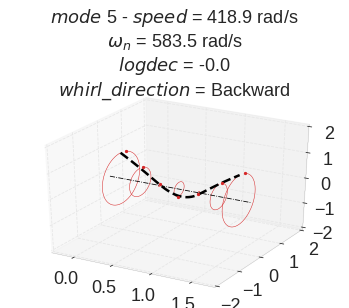

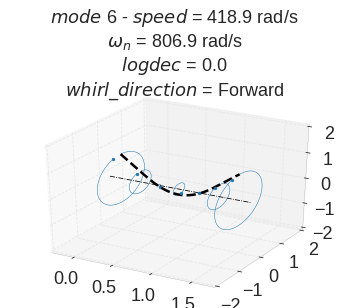

In [7]:
for i in np.arange(0,5.1,1):
    modal592c.plot_mode3D(mode=int(i))